<h1>Mini Project : Estimating Tree Cover and Carbon Stock from Satellite Imagery</h1>



### **Objective:**
To detect vegetated areas in a satellite image using the NDVI (Normalized Difference Vegetation Index) and estimate basic carbon stock for a small forested region.

### **Key Concepts:**
- NDVI – Used to detect vegetation using infrared and red bands.

- Vegetation Mapping – Basic image classification based on vegetation index.

- Carbon Stock Estimation – Using canopy cover as a proxy for carbon stock.

- Forestry Carbon Credits – Understanding how tree cover relates to CO₂ offset.

### **Region Chosen:**
I selected a forested region (Banff National Park, Alberta) based on its dense vegetation and environmental significance.

*Date of image used: June 29, 2025*

Reason for selection: Cloud-free, recent image with visible and dense forest cover, ideal for vegetation analysis.



1. Accessed Sentinel Hub EO Browser

- Website used: https://apps.sentinel-hub.com/eo-browser
- Searched for the forested region using the map tool and navigation bar.

2. Selected Satellite Dataset
- Choose Sentinel-2 L2A (Surface Reflectance) for accurate vegetation analysis.

3. Filtered by Date and Cloud Cover
- Used filter options to select a single cloud-free image dated June 29, 2025.
- Ensured the selected image had minimal or no cloud cover for clear NDVI calculation.

4. Configured Download Settings in Analytical Tab
- Image format: TIFF (16-bit) — to preserve data precision.
- Image resolution: Medium (1250 x 910 px) — suitable for fast local analysis.
- Coordinate System: WGS 84 (EPSG:4326) — widely supported in Python/GIS tools.
- Enabled Clip extra bands to reduce file size.
5. Selected Required Bands for NDVI
Checked:
  - B04 – Red band
  - B08 – Near Infrared (NIR) band

6. Downloaded the Files
Successfully downloaded two .tif files:
  - B04.tif – Red band
  - B08.tif – NIR band

These bands are essential inputs for calculating NDVI, which helps in detecting vegetated areas and estimating forest carbon stock.

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 67.4 MB/s eta 0:00:00


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Loading and processing the red and NIR (near-infrared) bands
#Read bands
with rasterio.open("/content/2025-06-29-00_00_2025-06-29-23_59_Sentinel-2_L2A_B04_(Raw).tiff") as red_src:
    red = red_src.read(1).astype('float32')

with rasterio.open("/content/2025-06-29-00_00_2025-06-29-23_59_Sentinel-2_L2A_B08_(Raw).tiff") as nir_src:
    nir = nir_src.read(1).astype('float32')


- NDVI : Normalized Difference Vegetation Index, simple mathematical index used to detect live green vegetation.
- It captures visisble and invisible bands like near infrared and red light.
  - Plants absorb red light(for photosynthesis) {low red -> more red light absorbed for photosynthesis}
  - Plant reflect near-infrared light (becuase of cell strucutre) {hight nir -> strong reflection}
    - high NIR,low red : Healthy vegetation {NDVI - high}
    - low NIR, high red : Dry vegetation {NDVI - Low or negative}
- Formula

  $$NDVI = (NIR - red)/(NIR + red)$$

/tmp/ipython-input-13-2388274544.py:3: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red) #in some pixels, the denominator is zero, which leads to division by zero.


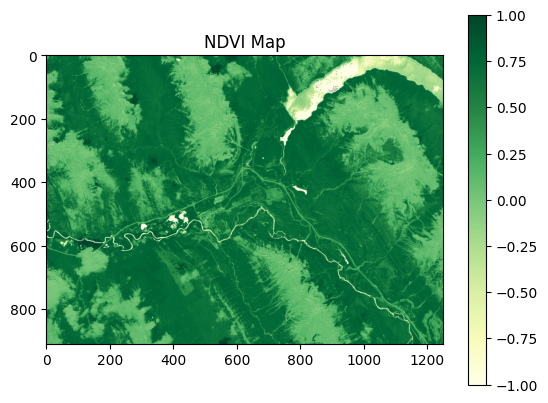

In [ ]:
#Computing and visualizing the NDVI map
#NDVI calculation
ndvi = (nir - red) / (nir + red) #in some pixels, the denominator is zero, which leads to division by zero.

# Plotting NDVI
plt.imshow(ndvi, cmap='YlGn')
plt.title("NDVI Map")
plt.colorbar()
plt.show()

**Vegetation Mask** <br>
All the pixels where vegetation is moderately healthy or better.

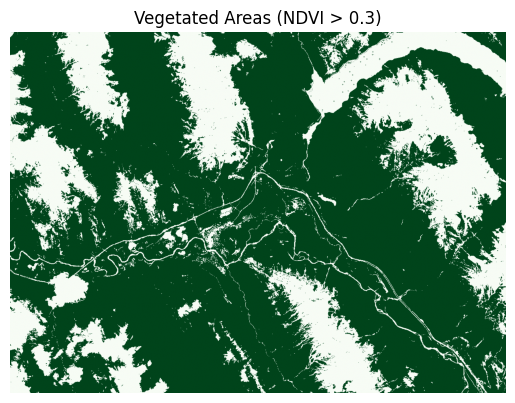

In [ ]:
#Classify Vegetated Areas (NDVI Thresholding)
#Create a vegetation mask
vegetation_mask = ndvi > 0.3  #threshold for vegetation

#Visualize vegetation mask
plt.imshow(vegetation_mask, cmap='Greens')
plt.title("Vegetated Areas (NDVI > 0.3)")
plt.axis('off')
plt.show()


In [ ]:
#Convert the number of vegetated pixels into hectares
#Estimate vegetated area
pixel_size = 10  #meter
pixel_area_m2 = pixel_size * pixel_size  #100 m²

vegetated_pixels = np.sum(vegetation_mask)
total_area_m2 = vegetated_pixels * pixel_area_m2
total_area_ha = total_area_m2 / 10_000  #1 hectare = 10,000 m²

print(f"Vegetated Area: {total_area_ha:.2f} hectares")

Vegetated Area: 7987.15 hectares


*Vegetated Area: 7987.15 hectares*
- Identified areas covered with healthy vegetation (NDVI > 0.3)
- 7987.15 hectares of tree/ vegetation cover.

**1 hectare = 10,000 m², we found about 79.87 million square meters of forest covered in banff national park on June 29, 2025**


**Carbon Stock** <br>
Amount of carbon stored in vegetation <br>
- carbon in trees = carbon not in the atmosphere as CO₂

In [ ]:
#Use simple carbon density value (50 tonnes/hectare)
#Estimate Carbon Stock
carbon_per_hectare = 50  #tonnes of carbon per hectare
total_carbon = total_area_ha * carbon_per_hectare

print(f"Estimated Carbon Stock: {total_carbon:.2f} tonnes of carbon")

Estimated Carbon Stock: 399357.50 tonnes of carbon


*Estimated Carbon Stock: 399357.50 tonnes of carbon*

- Standard forest carbon density assumption : 50 tonnes/hectare

**The trees and vegetation are estimated to be storing around 399,357 tonnes of carbon in total**

In [ ]:
#Convert carbon to CO₂ equivalent
co2_equivalent = total_carbon * 3.67
print(f"Estimated CO₂ Sequestered: {co2_equivalent:.2f} tonnes")

Estimated CO₂ Sequestered: 1465642.02 tonnes


**The trees absorbed and stored about 1.46 million tonnes of CO₂ from the atmosphere.**

### 1 carbon credit = 1 tonne of CO₂ removed, avoided, or not emitted

In [ ]:
carbon_credits = co2_equivalent  #1 credit = 1 tonne CO₂
print(f"Estimated Carbon Credits: {carbon_credits:.0f} credits")

Estimated Carbon Credits: 1465642 credits


**Based on the estimated 1.46 million tonnes of CO₂ sequestered by the forested region, the area could potentially generate 1,465,642 carbon credits.**